In [1]:
from ansys.mapdl.core import launch_mapdl
from ansys.math.core.math import AnsMath

import matplotlib.pyplot as plt
import numpy as np
mapdl = launch_mapdl(nproc=4)
mm = AnsMath(mapdl)
mapdl.nerr(10000)


PyMAPDL is taking longer than expected to connect to an MAPDL session.
Checking if there are any available licenses...


NUMBER OF DISPLAYED ERRORS ALLOWED PER COMMAND=              10000
 NUMBER OF ERRORS ALLOWED PER COMMAND BEFORE ANSYS ABORT=     10000
 ABORT LEVEL KEY= -1
 ALL ERRORS WRITTEN TO C:\Users\v196m\AppData\Local\Temp\ansys_ndbbwjkieo\file0.err                                                                                                                                                                                                        
 DO NOT TERMINATE /INPUT UPON FIRST ERROR

In [17]:
mapdl.clear()

## PREP7

#### PREP7 setup

In [18]:
import numpy as np
bool_check_real_shape = 0 # Display the model in define thickness 

# PREP setting
bool_inner = 1
bool_stair = 1      # Both bool_inner = 1 and bool_stair = 1, then stair will be built
bool_SSI   = 1      # MATRIX27 soil-structure interection
elem_size  = 0.4    #[m]


# SOLU setting
Solu_type = 3       # ANYTYPE: if 2 = Modal, 3 = Harmonic, 4 = transient
Star_Freq = 0.001   # [Hz]
End_Freq  = 100      # [Hz]
Freq_Incr = 0.4     # [Hz]  Only use for calculate num of step, however, the final num of step might be different due to auto-process
N_modes   = 40      # Only use for ANYTYPE = 2
Damping_ratio = 0.05 

# POST setting
bool_write_result_csv = 1 # if bool_write_result_csv = 1, The POST26 results will be written as csv and save in designated folder.


#*************************** Geometry information ***************************#
#
height          = 3.37  #[m]
n_storeys       = 3     #[m]


#*************************** Material properties ***************************#
#
# Assume the column_eg (BEAM element) in EG has the same property as inner wall (SHELL element)
# Thickness [m]-----------------------------------------------
t_slab          = 0.468 
t_corridor      = 0.8
t_ground        = 0.05
t_edge_wall     = 0.2
t_inner_wall    = 0.2
t_stair         = 0.468

# Young's modulus [N/m^2] -----------------------------------------------
E_slab          = 30e9  
E_corridor      = 30e9
E_ground        = 30e9
E_edge_wall     = 30e9
E_inner_wall    = 30e9
E_stair         = 30e9

# Poisson's ratio [-] -----------------------------------------------
nu_slab         = 0.27  
nu_corridor     = 0.27
nu_ground       = 0.27
nu_edge_wall    = 0.27
nu_inner_wall   = 0.27
nu_stair        = 0.27

# Density [kg/m^3] -----------------------------------------------
rho_slab        = 2500  
rho_corridor    = 2500 
rho_ground      = 2500 
rho_edge_wall   = 2500 
rho_inner_wall  = 2500 
rho_stair       = 2500


#-----------------------Soil properties------------------------#
Vs_soil         = 450          # Shear wave velocity [m/s]
Rho_soil        = 2.3e3        # Soil density [kg/m^3]
Nu_soil         = 0.33         # Soil Poisson's Ratio [-]
L_f             = elem_size/2  # Foundation half-length [m]
B_f             = elem_size/2  # Foundation half-width [m]

#### PREP7 geometry define

In [19]:
coord_x = np.array([0.0000, 0.4400, 2.2100, 3.4100, 5.1800, 6.3800, 8.1500, 9.3500, 11.120, 12.320, 14.092, 15.290, 17.060, 18.471, 17.584, 16.553, 15.799, 14.768, 14.014, 12.983,12.398, 12.229, 11.199, 10.444, 9.4140, 8.9870, 8.6590, 7.6290, 7.2020, 5.5550,4.4430, 3.1420, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 3.2600, 4.5900, 8.7900,4.5900, 4.5900, 4.5900, 4.5900, 4.5900, 2.9230, 2.9230, 1.4700, 1.4700, 2.3600,3.2600, 5.6620, 0.0000, 2.2100, 2.2100, 3.2600, 1.1500])
coord_y = np.array([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,0.0000, 0.0000, 0.0000, 0.0000, 1.0970, 2.3730, 3.3060, 4.5820, 5.5150, 6.7910,  7.5150, 7.7240, 9.0000, 9.9330, 11.209, 11.737, 12.142, 13.418, 13.946, 15.984,17.361, 18.970, 18.970, 16.120, 11.700, 10.450, 4.6000, 4.6000, 4.6000, 4.6000,5.8500, 8.1850, 9.6100, 10.860, 11.836, 13.870, 16.120, 16.120, 13.870, 10.450,9.3360, 8.9700, 13.870, 3.1000, 4.6000, 5.7500, 10.450])
num_kp  = len(coord_x)

mapdl.prep7()
mapdl.units("SI") 
for i_storey in range(n_storeys+1):
    for i_kp in range(num_kp):
        n_kp = i_storey*num_kp +  i_kp + 1
        n_coor = i_kp
        x_kp = coord_x[n_coor]
        y_kp = coord_y[n_coor]
        mapdl.k(n_kp, x_kp, y_kp,i_storey*height)


for i_storey in range(n_storeys-1):
    num_acc = ((n_storeys+1)*num_kp) + (i_storey*num_kp)
    mapdl.k( 1 + num_acc, 0.0000, 8.4500,11*(height/18) +(i_storey)*height)
    mapdl.k( 2 + num_acc, 0.0000, 7.3750,11*(height/18) +(i_storey)*height)
    mapdl.k( 3 + num_acc, 0.0000, 5.7500, 4*(height/18) +(i_storey)*height)
    mapdl.k( 4 + num_acc, 0.0000, 4.6000, 4*(height/18) +(i_storey)*height)
    mapdl.k( 5 + num_acc, 1.1500, 4.6000, 4*(height/18) +(i_storey)*height)
    mapdl.k( 6 + num_acc, 1.9600, 4.6000,        0.0000 +(i_storey)*height)
    mapdl.k( 7 + num_acc, 1.9600, 5.7500,        0.0000 +(i_storey)*height)
    mapdl.k( 8 + num_acc, 1.1500, 5.7500, 4*(height/18) +(i_storey)*height)
    mapdl.k( 9 + num_acc, 1.1500, 7.3750,11*(height/18) +(i_storey)*height)
    mapdl.k(10 + num_acc, 1.1500, 8.4500,11*(height/18) +(i_storey)*height)
    mapdl.k(11 + num_acc, 1.1500, 10.450,        height +(i_storey)*height)
    mapdl.k(12 + num_acc, 3.2600, 5.7500,        0.0000 +(i_storey)*height)




#### PREP7 Model building

In [20]:
for i_storey in range(n_storeys+1):
    # AREA 1
    A_kp_1 = 34 + (i_storey*num_kp)
    A_kp_2 = 53 + (i_storey*num_kp)
    A_kp_3 = 49 + (i_storey*num_kp)
    A_kp_4 = 48 + (i_storey*num_kp)
    mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4)
    #
    # AREA 2
    A_kp_1 = 31 + (i_storey*num_kp)
    A_kp_2 = 32 + (i_storey*num_kp)
    A_kp_3 = 33 + (i_storey*num_kp)
    A_kp_4 = 34 + (i_storey*num_kp)
    A_kp_5 = 48 + (i_storey*num_kp)
    A_kp_6 = 47 + (i_storey*num_kp)
    mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6)
    #
    # AREA 3
    A_kp_1 = 30 + (i_storey*num_kp)
    A_kp_2 = 31 + (i_storey*num_kp)
    A_kp_3 = 47 + (i_storey*num_kp)
    A_kp_4 = 48 + (i_storey*num_kp)
    A_kp_5 = 49 + (i_storey*num_kp)
    A_kp_6 = 46 + (i_storey*num_kp)
    mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6)
    #
    # AREA 4
    A_kp_1 = 21 + (i_storey*num_kp)
    A_kp_2 = 22 + (i_storey*num_kp)
    A_kp_3 = 23 + (i_storey*num_kp)
    A_kp_4 = 24 + (i_storey*num_kp)
    A_kp_5 = 25 + (i_storey*num_kp)
    A_kp_6 = 26 + (i_storey*num_kp)
    A_kp_7 = 52 + (i_storey*num_kp)
    A_kp_8 = 42 + (i_storey*num_kp)
    A_kp_9 = 41 + (i_storey*num_kp)
    A_kp_10= 39 + (i_storey*num_kp)
    A_kp_11= 40 + (i_storey*num_kp)
    mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6, A_kp_7, A_kp_8, A_kp_9, A_kp_10, A_kp_11)
    #
    # AREA 5
    A_kp_1 = 26 + (i_storey*num_kp)
    A_kp_2 = 27 + (i_storey*num_kp)
    A_kp_3 = 28 + (i_storey*num_kp)
    A_kp_4 = 29 + (i_storey*num_kp)
    A_kp_5 = 45 + (i_storey*num_kp)
    A_kp_6 = 44 + (i_storey*num_kp)
    A_kp_7 = 43 + (i_storey*num_kp)
    A_kp_8 = 42 + (i_storey*num_kp)
    A_kp_9 = 52 + (i_storey*num_kp)
    mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6, A_kp_7, A_kp_8, A_kp_9)
    #
    # AREA 6
    A_kp_1 = 10 + (i_storey*num_kp)
    A_kp_2 = 11 + (i_storey*num_kp)
    A_kp_3 = 12 + (i_storey*num_kp)
    A_kp_4 = 13 + (i_storey*num_kp)
    A_kp_5 = 14 + (i_storey*num_kp)
    A_kp_6 = 15 + (i_storey*num_kp)
    A_kp_7 = 16 + (i_storey*num_kp)
    A_kp_8 = 17 + (i_storey*num_kp)
    A_kp_9 = 18 + (i_storey*num_kp)
    A_kp_10= 19 + (i_storey*num_kp)
    A_kp_11= 20 + (i_storey*num_kp)
    A_kp_12= 21 + (i_storey*num_kp)
    A_kp_13= 40 + (i_storey*num_kp)
    mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6, A_kp_7, A_kp_8, A_kp_9, A_kp_10, A_kp_11, A_kp_12, A_kp_13)
    #
    # AREA 7 
    A_kp_1 = 3 + (i_storey*num_kp)
    A_kp_2 = 4 + (i_storey*num_kp)
    A_kp_3 = 5 + (i_storey*num_kp)
    A_kp_4 = 6 + (i_storey*num_kp)
    A_kp_5 = 7 + (i_storey*num_kp)
    A_kp_6 = 8 + (i_storey*num_kp)
    A_kp_7 = 9 + (i_storey*num_kp)
    A_kp_8 = 10 + (i_storey*num_kp)
    A_kp_9 = 40 + (i_storey*num_kp)
    A_kp_10= 39 + (i_storey*num_kp)
    A_kp_11= 38 + (i_storey*num_kp)
    A_kp_12= 55 + (i_storey*num_kp)
    A_kp_13= 54 + (i_storey*num_kp)
    mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6, A_kp_7, A_kp_8, A_kp_9, A_kp_10, A_kp_11, A_kp_12, A_kp_13)
    #
    # AREA 8
    A_kp_1 = 1 + (i_storey*num_kp)
    A_kp_2 = 2 + (i_storey*num_kp)
    A_kp_3 = 3 + (i_storey*num_kp)
    A_kp_4 = 54+ (i_storey*num_kp)
    A_kp_5 = 55+ (i_storey*num_kp)
    A_kp_6 = 37+ (i_storey*num_kp)
    mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6)
    #
    # AREA 9 
    A_kp_1 = 37 + (i_storey*num_kp)
    A_kp_14 =55 + (i_storey*num_kp)
    A_kp_2 = 38 + (i_storey*num_kp)
    A_kp_3 = 56 + (i_storey*num_kp)
    A_kp_4 = 41 + (i_storey*num_kp)
    A_kp_5 = 42 + (i_storey*num_kp)
    A_kp_6 = 43 + (i_storey*num_kp)
    A_kp_7 = 44 + (i_storey*num_kp)
    A_kp_8 = 45 + (i_storey*num_kp)
    A_kp_9 = 46 + (i_storey*num_kp)
    A_kp_10= 49 + (i_storey*num_kp)
    A_kp_11= 53 + (i_storey*num_kp)
    A_kp_12= 35 + (i_storey*num_kp)
    A_kp_13= 36 + (i_storey*num_kp)
    mapdl.a(A_kp_1, A_kp_14, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6, A_kp_7, A_kp_8, A_kp_9, A_kp_10, A_kp_11, A_kp_12, A_kp_13)
    #
    # AREA 10
    A_kp_1 = 38 + (i_storey*num_kp)
    A_kp_2 = 39 + (i_storey*num_kp)
    A_kp_3 = 41 + (i_storey*num_kp)
    A_kp_4 = 56 + (i_storey*num_kp)
    mapdl.a(A_kp_1, A_kp_2, A_kp_3, A_kp_4)
    #
    # AREA 11
    if i_storey <n_storeys and i_storey != 0:
        A_kp_1 = 37 + (i_storey*num_kp)
        A_kp_2 = 55 + (i_storey*num_kp)
        A_kp_3 = 38 + (i_storey*num_kp)
        A_kp_4 = 56 + (i_storey*num_kp)
        A_kp_5 = 51 + (i_storey*num_kp)
        A_kp_6 = 50 + (i_storey*num_kp)
        A_kp_7 = 57 + (i_storey*num_kp)
        A_kp_8 = 36 + (i_storey*num_kp)
        mapdl.a( A_kp_1, A_kp_2, A_kp_3, A_kp_4, A_kp_5, A_kp_6, A_kp_7, A_kp_8)

num_count = (n_storeys*num_kp)
mapdl.a( 29+num_count, 30+num_count, 46+num_count, 45+num_count)
aout1 = mapdl.asba(19, 21)
aout2 = mapdl.asba(30, 32)




mapdl.asel('ALL')
mapdl.asel('S', 'AREA', '', 44)
mapdl.asel('A', 'AREA', '', 19)
mapdl.asel('A', 'AREA', '', 41)
mapdl.asel('A', 'AREA', '', 42)
mapdl.asel('A', 'AREA', '', 31)
mapdl.asel('A', 'AREA', '', 20)
mapdl.cm('corridor_floor', 'AREA')
#mapdl.aplot(show_area_numbering=True, color_areas=True)
#mapdl.asel('S', 'AREA', '', 'corridor_floor')
mapdl.asel('ALL')






for i_storey in range(1,n_storeys+1):
    kp_id_2 = 14
    for i_kp in range(1,kp_id_2+1):
        if i_kp % 2 != 0:
            A_kp_1 = i_kp + ((i_storey-1)*num_kp)
            A_kp_2 = i_kp + 1 + ((i_storey-1)*num_kp)
            A_kp_3 = i_kp + 1 + ((i_storey)*num_kp)
            A_kp_4 = i_kp + ((i_storey)*num_kp)
            mapdl.a( A_kp_1, A_kp_2, A_kp_3, A_kp_4)

    kp_id_3 = 21
    for i_kp in range(kp_id_2,kp_id_3+1):
        if i_kp % 2 == 0:
                A_kp_1 = i_kp + ((i_storey-1)*num_kp)
                A_kp_2 = i_kp + 1 + ((i_storey-1)*num_kp)
                A_kp_3 = i_kp + 1 + ((i_storey)*num_kp)
                A_kp_4 = i_kp + ((i_storey)*num_kp)
                mapdl.a( A_kp_1, A_kp_2, A_kp_3, A_kp_4)
    #
    kp_id_4 = 26
    for i_kp in range(kp_id_3,kp_id_4+1):
        if i_kp % 2 != 0:
                A_kp_1 = i_kp + ((i_storey-1)*num_kp)
                A_kp_2 = i_kp + 1 + ((i_storey-1)*num_kp)
                A_kp_3 = i_kp + 1 + ((i_storey)*num_kp)
                A_kp_4 = i_kp + ((i_storey)*num_kp)
                mapdl.a( A_kp_1, A_kp_2, A_kp_3, A_kp_4)
    #
    kp_id_5 = 29
    for i_kp in range(kp_id_4,kp_id_5+1):
        if i_kp % 2 == 0:
                A_kp_1 = i_kp + ((i_storey-1)*num_kp)
                A_kp_2 = i_kp + 1 + ((i_storey-1)*num_kp)
                A_kp_3 = i_kp + 1 + ((i_storey)*num_kp)
                A_kp_4 = i_kp + ((i_storey)*num_kp)
                mapdl.a( A_kp_1, A_kp_2, A_kp_3, A_kp_4)
    #
    # Wall without window
    #
    for i_kp in range(30,34):
        A_kp_1 = i_kp + ((i_storey-1)*num_kp)
        A_kp_2 = i_kp + 1 + ((i_storey-1)*num_kp)
        A_kp_3 = i_kp + 1 + ((i_storey)*num_kp)
        A_kp_4 = i_kp + ((i_storey)*num_kp)
        mapdl.a( A_kp_1, A_kp_2, A_kp_3, A_kp_4)
    #
    # Aufzug
    #
    if i_storey != 1:
        mapdl.a( 29+ ((i_storey-1)*num_kp), 30+ ((i_storey-1)*num_kp), 30+ ((i_storey)*num_kp), 29+ ((i_storey)*num_kp))
    #
    mapdl.a( 34 + ((i_storey-1)*num_kp), 53 + ((i_storey-1)*num_kp), 53+ ((i_storey)*num_kp), 34+ ((i_storey)*num_kp))
    mapdl.a( 53 + ((i_storey-1)*num_kp), 35 + ((i_storey-1)*num_kp), 35+ ((i_storey)*num_kp), 53+ ((i_storey)*num_kp))
    mapdl.a( 36 + ((i_storey-1)*num_kp), 37 + ((i_storey-1)*num_kp), 37+ ((i_storey)*num_kp), 36+ ((i_storey)*num_kp))
    mapdl.a( 37 + ((i_storey-1)*num_kp),  1 + ((i_storey-1)*num_kp),  1+ ((i_storey)*num_kp), 37+ ((i_storey)*num_kp))
    #
mapdl.cm('outside_wall', 'AREA')






if bool_inner:
    for i_storey in range(n_storeys):
        # Treppen Haus
        mapdl.a(37+(i_storey*num_kp), 38+(i_storey*num_kp), 38+((i_storey+1)*num_kp), 37+((i_storey+1)*num_kp))
        # Aufzug
        mapdl.a(45+(i_storey*num_kp), 29+(i_storey*num_kp), 29+((i_storey+1)*num_kp), 45+((i_storey+1)*num_kp))
        mapdl.a(46+(i_storey*num_kp), 30+(i_storey*num_kp), 30+((i_storey+1)*num_kp), 46+((i_storey+1)*num_kp))
        # Teekueche 
        mapdl.a(47+(i_storey*num_kp), 31+(i_storey*num_kp), 31+((i_storey+1)*num_kp), 47+((i_storey+1)*num_kp))
        # Technik
        mapdl.a(49+(i_storey*num_kp), 48+(i_storey*num_kp), 48+((i_storey+1)*num_kp), 49+((i_storey+1)*num_kp))
        mapdl.a(48+(i_storey*num_kp), 34+(i_storey*num_kp), 34+((i_storey+1)*num_kp), 48+((i_storey+1)*num_kp))
        #
    #
    # EG config
    #
    #A, 38, 39, 39+(1*num_kp), 38+(1*num_kp)
    mapdl.a( 41, 42, 42+(1*num_kp), 41+(1*num_kp))
    mapdl.a( 52, 26, 26+(1*num_kp), 52+(1*num_kp))
    mapdl.lsel('NONE')
    mapdl.l(39, 39+(1*num_kp))# BEAM elemetn (only this one)   
    mapdl.cm('column_eg', 'LINE')
    mapdl.lsel('ALL')
    #
    # 1 OG config
    #
    mapdl.a( 39+(1*num_kp), 40+(1*num_kp), 40+(2*num_kp), 39+(2*num_kp))
    mapdl.a( 40+(1*num_kp), 21+(1*num_kp), 21+(2*num_kp), 40+(2*num_kp))
    mapdl.a( 40+(1*num_kp), 10+(1*num_kp), 10+(2*num_kp), 40+(2*num_kp))
    mapdl.a(  3+(1*num_kp), 54+(1*num_kp), 54+(2*num_kp),  3+(2*num_kp))
    #
    # 1, 2 OG config
    #
    for i_storey in range(1,n_storeys):
        mapdl.a( 41+(i_storey*num_kp), 42+(i_storey*num_kp), 42+((i_storey+1)*num_kp), 41+((i_storey+1)*num_kp))
        mapdl.a( 42+(i_storey*num_kp), 43+(i_storey*num_kp), 43+((i_storey+1)*num_kp), 42+((i_storey+1)*num_kp))
        mapdl.a( 44+(i_storey*num_kp), 45+(i_storey*num_kp), 45+((i_storey+1)*num_kp), 44+((i_storey+1)*num_kp))
    #
    # 2 OG config
    #
    mapdl.a( 38+(2*num_kp), 39+(2*num_kp), 39+(3*num_kp), 38+(3*num_kp))





if bool_inner and bool_stair:
    for i_storey in range(n_storeys-1):
        #
        num_acc = ((n_storeys+1)*num_kp) + (i_storey*num_kp)
        #
        mapdl.a( 36 +  ((i_storey+1)*num_kp), 1 + num_acc , 10 + num_acc , 57+((i_storey+1)*num_kp) )
        mapdl.a(  1 +                num_acc, 2 + num_acc ,  9 + num_acc , 10 + num_acc)
        mapdl.a(  2 +                num_acc, 3 + num_acc ,  8 + num_acc ,  9 + num_acc)
        mapdl.a(  3 +                num_acc, 4 + num_acc ,  5 + num_acc ,  8 + num_acc)
        mapdl.a(  5 +                num_acc, 6 + num_acc ,  7 + num_acc ,  8 + num_acc)
        mapdl.a(  6+num_acc    , 38+((i_storey)*num_kp),  12 + num_acc, 7 + num_acc)
    mapdl.asba(9,152,'','DELETE','KEEP')
    mapdl.nummrg('kp')   








#************************* Creating group for element assignemnt **************************#
#
#
# Group floor slab id-----------------------------------------------
mapdl.asel('NONE')
for i_storey in range(1, n_storeys+1):
    mapdl.asel('A','LOC','Z',i_storey*height)
               
mapdl.asel('U','AREA','','corridor_floor')    # Delete unnecessary wall which is selected auto.
mapdl.asel('U','LOC','Y', (5.75+4.6)/2)
mapdl.cm('slab_floor','AREA')
mapdl.asel('ALL')
#
#
# Group floor Ground id-----------------------------------------------
mapdl.asel('ALL')
mapdl.asel('S','LOC','Z',0)
mapdl.cm('ground_floor','AREA')
mapdl.asel('ALL')
#
#
# Group Edge of building id-----------------------------------------------
mapdl.asel('S','AREA','','outside_wall ')
mapdl.asel('U','AREA','','slab_floor')
mapdl.asel('U','AREA','','ground_floor')
mapdl.asel('U','AREA','','corridor_floor ')
mapdl.cm('outside_wall','AREA')
mapdl.asel('ALL')
#
#
# Group Inner wall id-----------------------------------------------
if bool_inner:
    mapdl.asel('NONE')
    for i_storey in range(n_storeys):
        mapdl.asel('A','LOC','Z', i_storey*height + (height)/2)
    mapdl.asel('U','AREA','','outside_wall') 
    mapdl.cm('inner_wall','AREA')
    mapdl.asel('ALL')
    #
    # Group Stairs id-----------------------------------------------
    if bool_stair:
        mapdl.asel('S','LOC','X', 1.15/2)
        mapdl.asel('A','LOC','Y', (5.75+4.6)/2)
        mapdl.asel('U','AREA','','corridor_floor')
        mapdl.asel('U','AREA','',152)
        mapdl.asel('U','AREA','',10)
        mapdl.cm('stair_floor','AREA')
        mapdl.asel('ALL')



#*************************** Material properties ***************************#
# Move to 'PREP\BuildPara_Var','mac' 
mapdl.et(1, "SHELL181 ")
mapdl.sectype(1,'SHELL')
mapdl.secdata(t_slab)
mapdl.mp('EX',1,E_slab)
mapdl.mp('PRXY',1,nu_slab)
mapdl.mp('DENS',1,rho_slab)
mapdl.asel('S','AREA','','slab_floor')
mapdl.aatt(1,0,1,'',1)
mapdl.asel('ALL')

mapdl.et(2, "SHELL181 ")
mapdl.sectype(2,'SHELL')
mapdl.secdata(t_corridor)
mapdl.mp('EX',2,E_corridor)
mapdl.mp('PRXY',2,nu_corridor)
mapdl.mp('DENS',2,rho_corridor)
mapdl.asel('S','AREA','','corridor_floor')
mapdl.aatt(2,0,2,'',2)
mapdl.asel('ALL')

mapdl.et(3, "SHELL181 ")
mapdl.sectype(3,'SHELL')
mapdl.secdata(t_ground)
mapdl.mp('EX',3,E_ground)
mapdl.mp('PRXY',3,nu_ground)
mapdl.mp('DENS',3,rho_ground)
mapdl.asel('S','AREA','','ground_floor')
mapdl.aatt(3,0,3,'',3)
mapdl.asel('ALL')

mapdl.et(4,"SHELL181 ")
mapdl.sectype(4,'SHELL')
mapdl.secdata(t_edge_wall)
mapdl.mp('EX',4,E_edge_wall)
mapdl.mp('PRXY',4,nu_edge_wall)
mapdl.mp('DENS',4,rho_edge_wall)
mapdl.asel('S','AREA','','outside_wall')
mapdl.aatt(4,0,4,'',4)
mapdl.asel('ALL')

if bool_inner:
    mapdl.et(5,"SHELL181 ")
    mapdl.sectype(5,'SHELL')
    mapdl.secdata(t_inner_wall)
    mapdl.mp('EX',5,E_inner_wall)
    mapdl.mp('PRXY',5,nu_inner_wall)
    mapdl.mp('DENS',5,rho_inner_wall)
    mapdl.asel('S','AREA','','inner_wall')
    mapdl.aatt(5,0,5,'',5)
    mapdl.asel('ALL')

    if bool_stair:
        mapdl.et(6,"SHELL181 ")
        mapdl.sectype(6,'SHELL')
        mapdl.secdata(t_stair)
        mapdl.mp('EX',6,E_stair)
        mapdl.mp('PRXY',6,nu_stair)
        mapdl.mp('DENS',6,rho_stair)
        mapdl.asel('S','AREA','','stair_floor')
        mapdl.aatt(6,0,6,'',6)
        mapdl.asel('ALL')
    
    mapdl.et(7,"BEAM189")
    mapdl.sectype(7,'BEAM','RECT')
    mapdl.secoffset('CENT')
    mapdl.secdata(t_inner_wall,t_inner_wall)
    mapdl.mp('EX',7,E_inner_wall)
    mapdl.mp('PRXY',7,nu_inner_wall)
    mapdl.mp('DENS',7,rho_inner_wall)
    mapdl.lsel('S','LINE','','column_eg')
    mapdl.latt(7,0,7,'','',7)
    mapdl.lsel('ALL')




#### PREP7 - meshing and SSI

In [21]:
mapdl.lesize('ALL',elem_size)
mapdl.aesize('ALL',elem_size)
mapdl.amesh('ground_floor')
mapdl.nsel('S','LOC','Z',0)
mapdl.cm('ground_node','NODE')
mapdl.nsel('ALL')

if bool_SSI:
    #*************************** Define SSI properties ***************************##
    #   
    L1              =(4*L_f*B_f/3.14159)**0.5 	#sqrt(A_f/pi)[m]  #(from luco and wang, 1978)
    G               =(Vs_soil**2)*(Rho_soil)
    #
    #Parameters defined from Wolf,1997
    K_hor           = 8*G*L1/(2-Nu_soil)
    K_vert          = 4*G*L1/(1-Nu_soil)
    K_rock          = 8*G*(L1**3)/(3*(1-Nu_soil))
    K_tors          = 16*G*(L1**3)/3
    #
    #
    #Lumped Mass coefficient [kg] 
    M_Z             =((L1**2)/(Vs_soil**2))*0.27*K_vert	
    M_Y             =((L1**2)/(Vs_soil**2))*0.095*K_hor
    M_X             =((L1**2)/(Vs_soil**2))*0.095*K_hor
    Ix              = ((L1**2)/(Vs_soil**2))*0.24*K_rock	
    Iy              = ((L1**2)/(Vs_soil**2))*0.24*K_rock
    Iz              = ((L1**2)/(Vs_soil**2))*0.045*K_tors
    gamma_C_rock    = 0.3 / ( 1+ ((3*(1-Nu_soil)*Ix)/(8*L1**5*Rho_soil)) )
    gamma_C_tors    =(0.433/(1+((2*Iz)/(L1**5*Rho_soil))))*((Iz)/(L1**5*Rho_soil))**(0.5)
    C_hor           = L1*0.58*K_hor / Vs_soil
    C_vert          = L1*0.85*K_vert / Vs_soil
    C_rock          = L1*gamma_C_rock*K_rock/Vs_soil
    C_tors          = L1*gamma_C_tors*K_tors/Vs_soil
    #
    #
    #-Stiffness-------------------------
    Ka_11           = K_hor	
    Ka_22           = K_hor
    Ka_33           = K_vert					
    Ka_44           = K_rock		
    Ka_55           = K_rock	
    Ka_66           = K_tors
    Ka_15           = 0	
    Ka_24           = 0			
    #	
    #-damping--------------------------- 
    Ca_11           = C_hor	
    Ca_22           = C_hor
    Ca_33           = C_vert		
    Ca_44           = C_rock		
    Ca_55           = C_rock	
    Ca_66           = C_tors
    Ca_15           = 0
    Ca_24           = 0
    #
    #
    #
    mapdl.et(8, "MASS21", kop3=0)
    mapdl.type(8)
    mapdl.real(8)
    mapdl.r(8,M_X,M_Y,M_Z,Ix,Iy,Iz)
    #
    mapdl.et(9, "MATRIX27", kop1 = 1, kop2 = 0, kop3=4, kop4 = 1)
    mapdl.r(9,Ka_11,0,0,0,Ka_15,0)
    mapdl.rmore(-Ka_11,0,0,0,-Ka_15,0      )       # C7 to C12
    mapdl.rmore(Ka_22,0,Ka_24,0,0,0        )       # C13 to 18
    mapdl.rmore(-Ka_22,0,-Ka_24,0,0,Ka_33  )      	# C19 to 24
    mapdl.rmore(0,0,0,0,0,-Ka_33           )       # C25 to 30
    mapdl.rmore(0,0,0,Ka_44,0,0            )		# C31 to 36
    mapdl.rmore(0,-Ka_24,0,-Ka_44,0,0      )       # C37 to 42
    mapdl.rmore(Ka_55,0,-Ka_15,0,0,0       )       # C43 to 48
    mapdl.rmore(-Ka_55,0,Ka_66,0,0,0       )  		# C49 to 54
    mapdl.rmore(0,0,-Ka_66,Ka_11,0,0       )   	   # C55 to 60
    mapdl.rmore(0,Ka_15,0,Ka_22,0,Ka_24    )      	# C61 to 66
    mapdl.rmore(0,0,Ka_33,0,0,0 		   )		# C6_7 to 72
    mapdl.rmore(Ka_44,0,0,Ka_55,0,Ka_66    )      	# C73 to 78
    #
    mapdl.et(10, "MATRIX27", kop1 = 1, kop2 = 0, kop3=5, kop4 = 1)
    mapdl.r(10,Ca_11,0,0,0,Ca_15,0)           # C1 to C6
    mapdl.rmore(-Ca_11,0,0,0,-Ca_15,0)        # C7 to C12
    mapdl.rmore(Ca_22,0,Ca_24,0,0,0)          # C13 to 18
    mapdl.rmore(-Ca_22,0,-Ca_24,0,0,Ca_33)    # C19 to 24
    mapdl.rmore(0,0,0,0,0,-Ca_33)             # C25 to 30
    mapdl.rmore(0,0,0,Ca_44,0,0)              # C31 to 36
    mapdl.rmore(0,-Ca_24,0,-Ca_44,0,0)        # C37 to 42
    mapdl.rmore(Ca_55,0,-Ca_15,0,0,0)         # C43 to 48
    mapdl.rmore(-Ca_55,0,Ca_66,0,0,0)         # C49 to 54
    mapdl.rmore(0,0,-Ca_66,Ca_11,0,0)         # C55 to 60
    mapdl.rmore(0,Ca_15,0,Ca_22,0,Ca_24)      # C61 to 66
    mapdl.rmore(0,0,Ca_33,0,0,0)              # C67 to 72
    mapdl.rmore(Ca_44,0,0,Ca_55,0,Ca_66)      # C73 to 78
    #
    #
    n_count = mapdl.nsel('S','NODE','','ground_node')
    mapdl.ngen(2,len(n_count),'ground_node','','',0,0,-elem_size)
    mapdl.nsel('ALL')
    mapdl.nsel('S','LOC','Z',-elem_size)
    mapdl.cm('foundation_node','NODE')
    mapdl.nsel('ALL')
    mapdl.nummrg('NODE')
    #
    mapdl.knode('','ground_node')
    mapdl.nummrg('kp')
    mapdl.cmsel('ALL')
    mapdl.ksel('S','LOC','Z',0)
    mapdl.cm('ground_kp','KP')
    mapdl.cmsel('ALL')
    #
    mapdl.ksel('S','KP','','ground_kp')
    mapdl.katt(0,8,8)
    mapdl.ksel('ALL')
    #
    mapdl.nsel('ALL')
    mapdl.type(9)
    mapdl.real(9)
    mapdl.eintf('','','LOW',0,0,0,-elem_size,0)
    #
    mapdl.nsel('ALL')
    mapdl.type(10)
    mapdl.real(10)
    mapdl.eintf('','','LOW',0,0,0,-elem_size,0)
    mapdl.nsel('ALL')

    mapdl.asel('ALL')
    mapdl.asel('U','AREA','','ground_floor')
    mapdl.cm('area_remained','AREA')
    mapdl.asel('ALL')
    mapdl.amesh('area_remained')
#
if bool_inner:
    mapdl.lmesh('column_eg')
#
if bool_SSI:
    mapdl.kmesh('ground_kp')
#
mapdl.nsel('ALL')
mapdl.esel('ALL')
mapdl.ksel('ALL')
mapdl.nummrg('ELEM')
mapdl.nummrg('NODE')
mapdl.nsel('ALL')



    


array([    1,     2,     3, ..., 13016, 13017, 13018])

## SOLU

In [22]:
mapdl.run("/SOLU")
if Solu_type == 2:
    mapdl.antype(2)  
    mapdl.modopt('LANB',N_modes,Star_Freq,End_Freq,'','OFF' )

elif Solu_type == 3:
    freq = np.array([0,End_Freq])
    U_input = np.array([1,1])
    U_signal = np.column_stack((freq, U_input))
    mapdl.load_table("Impulse_disp", U_signal ,"FREQ")
    mapdl.antype(3)
    mapdl.eqslv('SPARSE')
    mapdl.hropt('AUTO')
    mapdl.outres("ALL","ALL")	
    mapdl.outres("NSOL","1")
    mapdl.outres("ESOL")
    mapdl.outres("RSOL")
    #
	#
    mapdl.nsel("ALL")
    mapdl.dmprat(Damping_ratio)			  
    #
    N_freq = ((End_Freq-Star_Freq) /Freq_Incr)+1
    mapdl.harfrq(Star_Freq,End_Freq)
    mapdl.nsubst(N_freq,5*N_freq,0.75*N_freq)
    #
    #
    if bool_SSI:
        mapdl.nsel('S','NODE','','foundation_node')
        mapdl.d("ALL","ROTX",0)
        mapdl.d("ALL","ROTY",0)
        mapdl.d("ALL","ROTZ",0)
        mapdl.d("ALL","UX",1)
        mapdl.d("ALL","UY",1)
        mapdl.d("ALL","UZ",1)
        mapdl.kbc(1)
        mapdl.nsel('ALL')
    else:
        mapdl.nsel('S','NODE','','ground_node')
        mapdl.d("ALL","ROTX",0)
        mapdl.d("ALL","ROTY",0)
        mapdl.d("ALL","ROTZ",0)
        mapdl.d("ALL","UX",1)
        mapdl.d("ALL","UY",1)
        mapdl.d("ALL","UZ",1)
        mapdl.kbc(1)
        mapdl.nsel('ALL')
mapdl.allsel()
mapdl.solve()



*** NOTE ***                            CP =     230.250   TIME= 16:13:17
 The automatic domain decomposition logic has selected the FREQ domain   
 decomposition method with 1 processes per frequency solution.           

 *****  ANSYS SOLVE    COMMAND  *****



   D I S T R I B U T E D   D O M A I N   D E C O M P O S E R

 ...Number of frequency solutions:  251
 ...Decompose to 4 frequency domains (with 1 processes per domain)


 *** NOTE ***                            CP =     230.516   TIME= 16:13:18
 There is no title defined for this analysis.                            

 *** SELECTION OF ELEMENT TECHNOLOGIES FOR APPLICABLE ELEMENTS ***
                ---GIVE SUGGESTIONS ONLY---

 ELEMENT TYPE         1 IS SHELL181. IT IS ASSOCIATED WITH ELASTOPLASTIC 
 MATERIALS ONLY. KEYOPT(8)=2 IS SUGGESTED AND KEYOPT(3)=2 IS SUGGESTED FOR
 HIGHER ACCURACY OF MEMBRANE STRESSES; OTHERWISE, KEYOPT(3)=0 IS SUGGESTED.

 ELEMENT TYPE         2 IS SHELL181. IT IS ASSOCIATED WITH ELASTOPLASTIC 
 MA

## POST26

In [23]:
#POST setting, Channel number (CH) is coording to matlab file
#
# Assumption
#
# half of the thickness of wall = 0.1 [m] 
t_wall_meas = 0.1
#
# 1OG ----------------------------------------------------------------------------
#
# CHANNEL 7,8,9
pos_TRIAX_1OG_X = 4.39 + t_wall_meas + 4.10 + 0.2  # 0.2 = distance from intersection of wall to center of geophone (appr.)
pos_TRIAX_1OG_Y = 4.60
pos_TRIAX_1OG_Z = 1*height
#
pos_CH10_X      = 4.59 + t_wall_meas + 1.21
pos_CH10_Y      = 4.60 - 1.92
pos_CH10_Z      = 1*height
#
pos_CH11_X      = 4.59 + t_wall_meas + 2.50 
pos_CH11_Y      = 9.61 - 1.47
pos_CH11_Z      = 1*height 
#
pos_CH12_X      = 11.387 #(already consider thickness of wall = 0.1, computed by CATIA) 
pos_CH12_Y      = 7.2700 #(already consider thickness of wall = 0.1, computed by CATIA)
pos_CH12_Z      = 1*height
#
#
# 2OG ----------------------------------------------------------------------------
#
# CHANNEL 1,2,3
pos_TRIAX_2OG_X = 11.387 #(already consider thickness of wall = 0.1, computed by CATIA)
pos_TRIAX_2OG_Y = 7.2700 #(already consider thickness of wall = 0.1, computed by CATIA)
pos_TRIAX_2OG_Z = 2*height
#
pos_CH13_X      = 14.037 #(computed in CATIA)
pos_CH13_Y      = 3.7 + t_wall_meas
pos_CH13_Z      = 2*height 
#
pos_CH14_X      = 4.59 + t_wall_meas + 2.50
pos_CH14_Y      = 9.61 - 1.47
pos_CH14_Z      = 2*height 
#
pos_CH15_X      = 4.39 + t_wall_meas + 4.84  
pos_CH15_Y      = 4.60
pos_CH15_Z      = 2*height 
#
#
# EG ----------------------------------------------------------------------------
#
#pos_TRIAX_EG_X  = not consider
#pos_TRIAX_EG_Y  = not consider
#pos_TRIAX_EG_Z  = not consider
#
#
n_triax_2OG = mapdl.queries.node(pos_TRIAX_2OG_X, pos_TRIAX_2OG_Y, pos_TRIAX_2OG_Z)
n_triax_1OG = mapdl.queries.node(pos_TRIAX_1OG_X, pos_TRIAX_1OG_Y, pos_TRIAX_1OG_Z)
n_CH10      = mapdl.queries.node(pos_CH10_X,pos_CH10_Y,pos_CH10_Z)
n_CH11      = mapdl.queries.node(pos_CH11_X,pos_CH11_Y,pos_CH11_Z)
n_CH12      = mapdl.queries.node(pos_CH12_X,pos_CH12_Y,pos_CH12_Z)
n_CH13      = mapdl.queries.node(pos_CH13_X,pos_CH13_Y,pos_CH13_Z)
n_CH14      = mapdl.queries.node(pos_CH14_X,pos_CH14_Y,pos_CH14_Z)
n_CH15      = mapdl.queries.node(pos_CH15_X,pos_CH15_Y,pos_CH15_Z)
#
mapdl.post26()
mapdl.numvar(200)
mapdl.nsol(11 , n_triax_2OG , 'U', 'X',  'FRF_CH_1')
mapdl.nsol(12 , n_triax_2OG , 'U', 'Y',  'FRF_CH_2')
mapdl.nsol(13 , n_triax_2OG , 'U', 'Z',  'FRF_CH_3')
mapdl.nsol(17 , n_triax_1OG , 'U', 'X',  'FRF_CH_7')
mapdl.nsol(18 , n_triax_1OG , 'U', 'Y',  'FRF_CH_8')
mapdl.nsol(19 , n_triax_1OG , 'U', 'Z',  'FRF_CH_9')
mapdl.nsol(110, n_CH10      , 'U', 'Z', 'FRF_CH_10')
mapdl.nsol(111, n_CH11      , 'U', 'Z', 'FRF_CH_11')
mapdl.nsol(112, n_CH12      , 'U', 'Z', 'FRF_CH_12')
mapdl.nsol(113, n_CH13      , 'U', 'Z', 'FRF_CH_13')
mapdl.nsol(114, n_CH14      , 'U', 'Z', 'FRF_CH_14')
mapdl.nsol(115, n_CH15      , 'U', 'Z', 'FRF_CH_15')
#
#
meas_FRFs = {}
sol = {}
Num_Freq = int((End_Freq / Freq_Incr))
#
U_real = np.zeros(Num_Freq)
U_imag = np.zeros(Num_Freq)
f = np.zeros(Num_Freq)
#
ch_list = np.array([1,2,3,7,8,9,10,11,12,13,14,15])
nsol_list = np.array([11,12,13,17,18,19,110,111,112,113,114,115])
Num_sol_point = len(nsol_list)
for i_sol in range(Num_sol_point):
    for i_freq in range(Num_Freq):
        f_curr = Freq_Incr*(i_freq+1)
        f[i_freq] = f_curr
        U_real[i_freq] = mapdl.get("U","VARI",str(nsol_list[i_sol]),"REAL",f_curr)
        U_imag[i_freq] = mapdl.get("U","VARI",str(nsol_list[i_sol]),"IMAG",f_curr)
        sol = {
            'freq':f,
            'real':U_real,
            'imag':U_imag,
            'ampl':np.sqrt(np.power(U_real,2)+np.power(U_imag,2))
            }
    U_real = np.zeros(Num_Freq)
    U_imag = np.zeros(Num_Freq)
    f = np.zeros(Num_Freq)

    meas_FRFs[f'disp_ch{ch_list[i_sol]}'] = sol

## Visualization

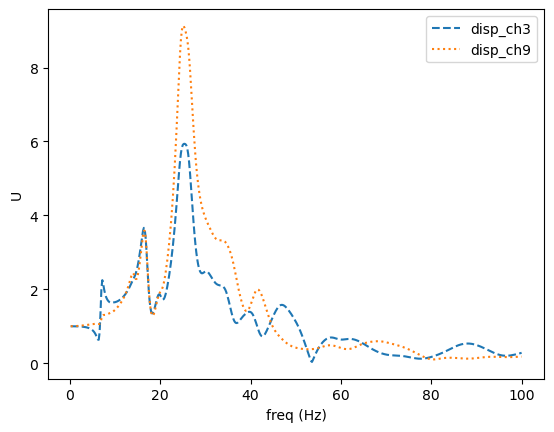

In [16]:
freq_values = meas_FRFs['disp_ch3']['freq']
frf_ampl3 = meas_FRFs['disp_ch3']['ampl']
plt.plot(freq_values, frf_ampl3, label="disp_ch3",linestyle="--")

frf_ampl = meas_FRFs['disp_ch9']['ampl']
plt.plot(freq_values, frf_ampl, label="disp_ch9",linestyle=":")

plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("U")
plt.show()

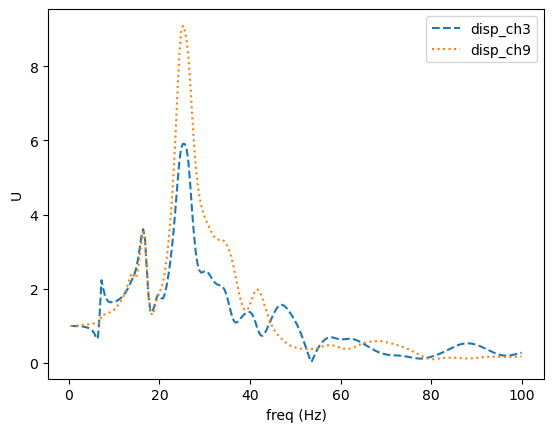

In [24]:
freq_values = meas_FRFs['disp_ch3']['freq']
frf_ampl3 = meas_FRFs['disp_ch3']['ampl']
plt.plot(freq_values, frf_ampl3, label="disp_ch3",linestyle="--")

frf_ampl = meas_FRFs['disp_ch9']['ampl']
plt.plot(freq_values, frf_ampl, label="disp_ch9",linestyle=":")

plt.legend()
plt.xlabel("freq (Hz)")
plt.ylabel("U")
plt.show()
